<a href="https://colab.research.google.com/github/nsajwan/line_item_extraction/blob/master/Line_Item_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank statements Line Item Extraction
Based on Cascade TableNet - https://github.com/DevashishPrasad/CascadeTabNet 

## 1. Install all the prerequisite
This will take a while, Remember to **Restart Runtime** after this step is done 

In [ ]:
!pip install torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html
!pip install -q mmcv terminaltables
!git clone --branch v1.2.0 'https://github.com/open-mmlab/mmdetection.git'
%cd "mmdetection"
!pip install -r "/content/mmdetection/requirements/optional.txt"
!python setup.py install
!python setup.py develop
!pip install -r {"requirements.txt"}
!pip install pillow==6.2.1 
!pip install mmcv==0.4.3
%cd "/content"
!apt-get install poppler-utils
!pip install pdf2image
!pip install pdfminer.six
!pip install Pillow

## 2. Clone the Repository

In [1]:
!rm -rf line_item_extraction
!git clone https://github.com/strangest-quark/line_item_extraction.git

Cloning into 'line_item_extraction'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 90 (delta 39), reused 45 (delta 12), pack-reused 0
Unpacking objects: 100% (90/90), done.


## 3. Pdf to Images and XML


In [85]:
!rm -rf /content/line_item_extraction/results
import os
from pdf2image import convert_from_path, convert_from_bytes
from PIL import Image
import subprocess

from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfpage import PDFPage


pdf_directory = '/content/line_item_extraction/sample_docs'
res_directory = '/content/line_item_extraction/results'
#cmd = 'pdftohtml -i -c -noframes -xml '
cmd2 = 'pdf2txt.py -t xml '
results = []



for filename in os.listdir(pdf_directory):
    if filename.endswith(".pdf"):
      print(filename)
      
      
      os.makedirs(res_directory+'/'+filename[:-4])
      #full_cmd = cmd+pdf_directory+'/'+filename+' '+res_directory+'/'+filename[:-4]+'/'+filename[:-4]+'.xml'
      #print(full_cmd)
      #print(extract_text_from_pdf(pdf_directory+'/'+filename))
      full_cmd = cmd2+ '-o ' + res_directory+'/'+filename[:-4] + '/' + filename[:-4]+'.xml ' + pdf_directory+'/'+filename
      #full_cmd = cmd+pdf_directory+'/'+filename+' '+res_directory+'/'+filename[:-4]+'/'+filename[:-4]+'.xml'
      print(full_cmd)
      print(" ")
      !{full_cmd}
      images = convert_from_path(pdf_directory+'/'+filename,dpi=144)
      i = 0
      print(i)
      os.makedirs(res_directory+'/'+filename[:-4]+'/img')
      for image in images:
        image.save(res_directory+'/'+filename[:-4]+'/img/'+str(i)+'.png', format='PNG')
        i=i+1
 




RedactedPayPal_sample3.pdf
pdf2txt.py -t xml -o /content/line_item_extraction/results/RedactedPayPal_sample3/RedactedPayPal_sample3.xml /content/line_item_extraction/sample_docs/RedactedPayPal_sample3.pdf
 
0
Redacted_CIBC_2_Sample2.pdf
pdf2txt.py -t xml -o /content/line_item_extraction/results/Redacted_CIBC_2_Sample2/Redacted_CIBC_2_Sample2.xml /content/line_item_extraction/sample_docs/Redacted_CIBC_2_Sample2.pdf
 
0
Redacted_BB&T_2_Sample2.pdf
pdf2txt.py -t xml -o /content/line_item_extraction/results/Redacted_BB&T_2_Sample2/Redacted_BB&T_2_Sample2.xml /content/line_item_extraction/sample_docs/Redacted_BB&T_2_Sample2.pdf
 
/bin/bash: T_2_Sample2/Redacted_BB: No such file or directory
/bin/bash: T_2_Sample2.xml: command not found
/bin/bash: T_2_Sample2.pdf: command not found
usage: pdf2txt.py [-h] [--version] [--debug] [--disable-caching]
                  [--page-numbers PAGE_NUMBERS [PAGE_NUMBERS ...]]
                  [--pagenos PAGENOS] [--maxpages MAXPAGES]
                  [--

## 3. Download the Pretrained Model


In [3]:
!gdown "https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT"

Downloading...
From: https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT
To: /content/epoch_36.pth
664MB [00:03, 215MB/s]


## 4. Run the Predictions

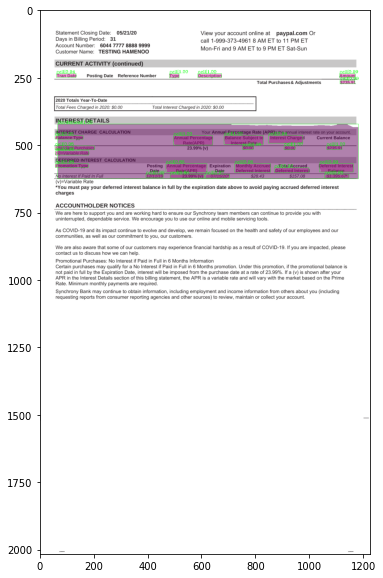

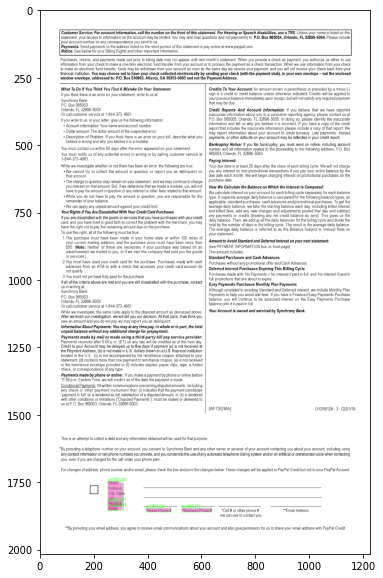

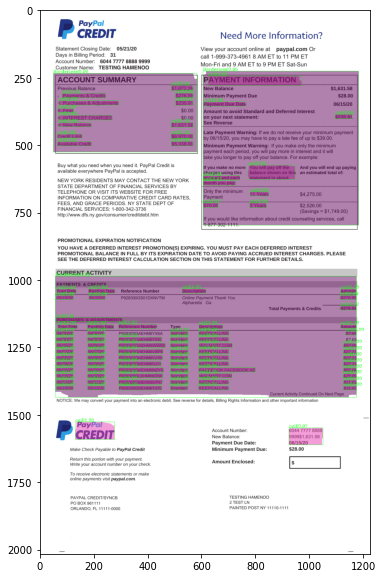

In [86]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
# Load model
config_file = '/content/line_item_extraction/config/cascade_mask_rcnn_hrnetv2p_w32_20e.py'
checkpoint_file = '/content/epoch_36.pth'
# build the model from a config file and a checkpoint file
"""Initialize a detector from config file.
Args:
    Config file path
    Checkpoint path. If left as None, the model  
        will not load any weights.  
Returns:
    nn.Module: The constructed detector."""
model = init_detector(config_file, checkpoint_file, device='cuda:0')

directory = '/content/line_item_extraction/results/RedactedPayPal_sample3/img/'

results = []

for filename in os.listdir(directory):
    if filename.endswith(".png"):
      # Run Inference
      """ 
      Inference image(s) with the detector.
   Args:
    model (nn.Module): The loaded detector.  
    imgs (str/ndarray or list[str/ndarray]): Either image files or loaded  
        images.  
  Returns:
    If imgs is a str, a generator will be returned, otherwise return the  
    detection results directly.
      """
      results.append(inference_detector(model, directory+'/'+filename))
      # Visualization results
      """
      Visualize the detection results on the image.
Args:
    img (str or np.ndarray): Image filename or loaded image.  
    result (tuple[list] or list): The detection result, can be either  
        (bbox, segm) or just bbox.  
    class_names (list[str] or tuple[str]): A list of class names.  
    score_thr (float): The threshold to visualize the bboxes and masks.  
    fig_size (tuple): Figure size of the pyplot figure.  
    out_file (str, optional): If specified, the visualization result will  
        be written to the out file instead of shown in a window.  
      """
      show_result_pyplot(directory+'/'+filename, results[-1],('Bordered', 'cell', 'Borderless'), score_thr=0.85)

After this, use TSR postprocessing for best result

In [87]:
%cd "/content"
from line_item_extraction.border_main import border
import lxml.etree as etree
import cv2
from google.colab.patches import cv2_imshow
from mmdet.apis import inference_detector, show_result, init_detector
import glob
from line_item_extraction.cell_text import borderless

result = results[0]

image_path = '/content/line_item_extraction/results/RedactedPayPal_sample3/img/'
xmlPath = '/content/line_item_extraction/results/'

config_fname = "/content/line_item_extraction/config/cascade_mask_rcnn_hrnetv2p_w32_20e.py" 
checkpoint_path = "/content/"
epoch = 'epoch_36.pth'

model = init_detector(config_fname, checkpoint_path+epoch)

imgs=[]

# List of images in the image_path
for filename in os.listdir(image_path):
    if filename.endswith(".png"):
      imgs.append(image_path+filename)
print(imgs)
for i in imgs:
  for i in imgs:
    try:
      result = inference_detector(model, i)
      res_border = []
      res_bless = []
      res_cell = []
      root = etree.Element("document")
      ## for border
      for r in result[0][0]:
        if r[4] > .85:
            res_border.append(r[:4].astype(int))
      ## for cells
      for r in result[0][1]:
          if r[4] > .85:
              r[4] = r[4] * 100
              res_cell.append(r.astype(int))
      ## for borderless
      for r in result[0][2]:
          if r[4] > .85:
              res_bless.append(r[:4].astype(int))

      ## if border tables detected
      if len(res_border) != 0:
          ## call border script for each table in image
          for res in res_border:
              try:
                  root.append(border(res, cv2.imread(i)))
              except:
                  pass
      if len(res_bless) != 0:
          if len(res_cell) != 0:
              for no, res in enumerate(res_bless):
                  root.append(borderless(res, cv2.imread(i), res_cell))
      myfile = open(xmlPath + i.split('/')[-1][:-3] + 'xml', "w")
      myfile.write('<?xml version="1.0" encoding="UTF-8"?>\n')
      myfile.write(etree.tostring(root, pretty_print=True, encoding="unicode"))
      myfile.close()
    except e:
      print("Error")
      

/content
['/content/line_item_extraction/results/RedactedPayPal_sample3/img/2.png', '/content/line_item_extraction/results/RedactedPayPal_sample3/img/1.png', '/content/line_item_extraction/results/RedactedPayPal_sample3/img/0.png']
[Table status] : Processing table with lines
[Table status] : Processing table with lines
[Table status] : Processing table with lines
[Table status] : Processing table with lines
[Table status] : Processing table with lines
[Table status] : Processing table with lines
[Table status] : Processing table with lines
[Table status] : Processing table with lines
[Table status] : Processing table with lines
[Table status] : Processing table with lines
[Table status] : Processing table with lines
[Table status] : Processing table with lines


In [88]:
!pip install pdfrw
from pdfrw import PdfReader
import xml.etree.ElementTree as et
import numpy

pdf = PdfReader('/content/line_item_extraction/sample_docs/RedactedPayPal_sample3.pdf')
from PIL import Image
im = Image.open('/content/line_item_extraction/results/RedactedPayPal_sample3/img/0.png')

def TranslateFromMachineCode(src, pdf, im):
        sx0, sy0, sx1, sy1 = src
        pdfWidth, pdfHeight = (int(pdf.pages[0].MediaBox[2]),int(pdf.pages[0].MediaBox[3]))
        imageWidth, imageHeight = im.size # size of png image 612x1008.  #1700x2800
        sy01 = imageHeight-sy1
        sy11 = imageHeight-sy0
        x0 = sx0/imageWidth*pdfWidth
        x1 = sx1/imageWidth*pdfWidth
        y0 = sy01/imageHeight*pdfHeight
        y1 = sy11/imageHeight*pdfHeight
        return (x0, y0, x1, y1)

def getText(textline):
  txt = ''
  for text in textline.getchildren():
      txt = txt+text.text
  return txt

def getTextFromPdf(points, pdf, page):
  found = False
  tree = et.ElementTree(file='/content/line_item_extraction/results/RedactedPayPal_sample3/RedactedPayPal_sample3.xml')
  page = tree.getroot().getchildren()[page]
  textboxes = page.getchildren()
  for textbox in textboxes:
    textlines = textbox.getchildren()
    for textline in textlines:
      if 'bbox' not in textline.attrib:
        continue
      coods = textline.attrib['bbox'].split(',')
      coods = [float(i) for i in coods] 
      points = [float(i) for i in points]
      diff = numpy.sum((numpy.asarray(points)-numpy.asarray(coods))**2)
      if diff<20:
        found = True
        txt = getText(textline)
        #print(coods, points, numpy.sum((numpy.asarray(points)-numpy.asarray(coods))**2), txt)
        return txt
  if not found:
    return found


In [89]:
import xml.etree.ElementTree as et
import lxml.etree as etree

tree = et.ElementTree(file='/content/line_item_extraction/results/0.xml')
tables = tree.getroot().getchildren()
foundCount = 0
notFoundCount = 0


bank_statement = etree.Element("bank_statement")

for table in tables:
  cells = table.getchildren()[1:]
  maxCol = 1;
  for cell in cells:
    #print("cell.attrib",cell.attrib['end-col'])
    if int(cell.attrib['end-col']) > maxCol:
      maxCol = int(cell.attrib['end-col'])
  if maxCol > 2:   
    table.set("lineItems", "true")
  else:
    table.set("lineItems", "false")  

for table in tables:
  if table.attrib['lineItems'] == "true":
    line_items = etree.SubElement(bank_statement, 'line_items')
  else:  
    line_items = etree.SubElement(bank_statement, 'others')
  cells = table.getchildren()[1:]
  key = ''
  startRow = 999
  headers = etree.SubElement(line_items, 'headers')
  headerStr = ""
  for cell in cells:
    coords = cell.getchildren()
    points = coords[0].attrib['points']
    point0 = int(points.split(' ')[0].split(',')[0])
    point1 = int(points.split(' ')[0].split(',')[1])
    point2 = int(points.split(' ')[2].split(',')[0])
    point3 = int(points.split(' ')[2].split(',')[1])
    text = getTextFromPdf(TranslateFromMachineCode((point0,point1,point2,point3), pdf, im), pdf, 0)

    if table.attrib['lineItems'] == "true":
      if cell.attrib['start-row'] == '0':
        if text == False:
          text = 'unknown'
        headerStr = "".join((headerStr, ', '+str(text)))
      else:
        if startRow != int(cell.attrib['start-row']):
          row = etree.SubElement(line_items, 'row')
        startRow = int(cell.attrib['start-row'])
        if text == False:
          keys = etree.SubElement(row, 'key')
          keys.text='unknown'
        else:  
          keys = etree.SubElement(row, 'key')
          keys.text=text.strip()
    else:
      if cell.attrib['start-col'] == '0':
        if text == False:
          key = etree.SubElement(line_items, 'unknown')
        else:  
          key = etree.SubElement(line_items, ''.join(filter(str.isalnum, str(text))))
      else:
        if text == False:
          key.text='unknown'
        else:  
          key.text=text

    if text != False:
      foundCount = foundCount+1
      textNode = et.Element("text")
      textNode.text = text
      cell.append(textNode)
    else:
      notFoundCount = notFoundCount+1
  if len(headerStr) > 0:
    headers.text =  headerStr

print('mapped='+str(foundCount)+' no matches='+str(notFoundCount))
# tree.write(open('/content/mapped.xml', 'wb'))
# x = etree.parse("/content/mapped.xml")
#print(etree.tostring(x, pretty_print=True).decode())

myfile = open('/content/mappedNew.xml', "w")
myfile.write('<?xml version="1.0" encoding="UTF-8"?>\n')
myfile.write(etree.tostring(bank_statement, pretty_print=True, encoding="unicode"))
myfile.close()
print(etree.tostring(bank_statement, pretty_print=True).decode())






mapped=93 no matches=14
<bank_statement>
  <line_items>
    <headers>, Tran Date
, unknown, unknown, Description
,  Amount
</headers>
    <row>
      <key>05/15/20</key>
      <key>05/15/20</key>
      <key>P928300GS01DXNVTM</key>
      <key>-$276.59</key>
      <key>unknown</key>
    </row>
    <row>
      <key>-$276.59</key>
    </row>
    <row>
      <key>PURCHASES  &amp; ADJUSTMENTS</key>
    </row>
    <row>
      <key>Tran Date</key>
      <key>unknown</key>
      <key>unknown</key>
      <key>Type</key>
      <key>Description</key>
      <key>Amount</key>
    </row>
    <row>
      <key>04/30/20</key>
      <key>04/30/20</key>
      <key>P928300GAEHM6YX6A</key>
      <key>Standard</key>
      <key>KEEPCALLING</key>
      <key>$7.65</key>
    </row>
    <row>
      <key>04/30/20</key>
      <key>04/30/20</key>
      <key>P928300GAEHM6YX62</key>
      <key>Standard</key>
      <key>KEEPCALLING</key>
      <key>$7.65</key>
    </row>
    <row>
      <key>05/06/20</key>
      <key>0